This cell shows how we learn the sensor attack from samples and prints the attacker. 

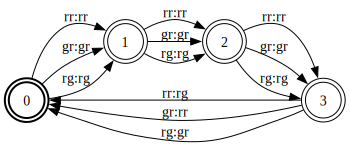

In [1]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang, fst2word, fst2word_list
from learning_funcs import auto2Hz, auto2Hz2, DFA2FST, WFA_SPEC_DECOMP, dfs, auto_paths, auto2basis, auto2small_basis
from TL_funcs import fst2auto, fst2tables 

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()


#sensor atttack 
As               = periodic_attacker( tab, key, 3 )
As_auto = fst2auto( As )

#actuator atttack 
Aa               = periodic_attacker( itab, ikey, 2 )
Aa_auto = fst2auto( Aa )

input_table, output_table, \
    input_alphabet, output_alphabet, \
    input_key_list, output_key_list\
    = fst2tables( As )
    
_, _, \
    _, _, \
    auto_key_list, _\
    = fst2tables( As_auto )

# P, S, word_list, Hb_word, Hb_array, Hb_list, Hb_word_big = auto2small_basis(As_auto)
Hz_array, Hz_word_array, word_list = auto2Hz2( As_auto )
# Hz_array_act, Hz_word_array, word_list = auto2Hz2( Aa_auto )

t0, T_array, tf, P = WFA_SPEC_DECOMP( Hz_array )
f, f_array = DFA2FST(t0, T_array, tf, \
    input_table, output_table, auto_key_list )
f 
# As # uncomment to see how As = f

This cell shows how we design a supervisor to neutralize the attacker above. 

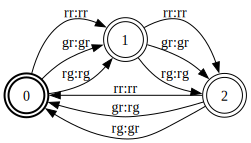

In [25]:
import numpy as np 
import pywrapfst as fst 
from TL_funcs import TL_auto_syms_table, TL_input_syms_table, TL_output_syms_table 
from TL_funcs import fst2auto, periodic_attacker, TL_desired_lang

table_auto, key_auto = TL_auto_syms_table()
itab, ikey = TL_input_syms_table() 
tab, key = TL_output_syms_table() 
desired = TL_desired_lang()

# sensor attack
attack     = periodic_attacker( tab, key, 2 )
attack_inv = attack.copy().invert().arcsort()

desired_inv = desired.copy().invert().arcsort() 
sup  = fst.compose(  attack_inv, desired_inv ).arcsort()
supc = fst.compose( attack, sup ).arcsort()
 
control = supc.copy().invert().arcsort()

control_auto = fst2auto( control )
control_auto = control_auto.minimize().arcsort()

desired_auto = fst2auto( desired.arcsort() )
fst.equivalent(control_auto , desired_auto)